In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df =pd.read_csv("Thyroid_Diff.csv")
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [3]:
# Lets check some dataset info

def info(df):
  print(f"Total rows and columns: {df.shape}\n")
  print(f"Columns are: {df.columns}\n")
  print("*"*170)

  # lets check the dtype and non null values and null values
  print("Info:\n ")
  print(f"{df.info()}\n\n")
  print(f"Null Values:\n {df.isnull().sum()}\n")
  print("*"*170)

  # lets check the weather the data is imbalance or not:
  print(f"Checking the Recurrence data is balanced or not:\n {df.Recurred.value_counts(normalize=True)*100}\n")

  # Alternate approch for checking imbalance data

  class_Yes = np.round((df['Recurred'].value_counts()["Yes"]/df.shape[0])*100,2)
  class_No = np.round((df['Recurred'].value_counts()["No"]/df.shape[0])*100,2)

  print(f"Percentage of Recurred occur means Yes: {class_Yes}\n")
  print(f"Percentage of Recurred did not occur means No: {class_No}\n")
  print("Here we have 2 options we can handled the imbalanced data set thorugh oversampling and under sampling and also we can use stratify")


info(df)

Total rows and columns: (383, 17)

Columns are: Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

**************************************************************************************************************************************************************************
Info:
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examinati

In [5]:
df.Recurred.value_counts()

No     275
Yes    108
Name: Recurred, dtype: int64

In [6]:
df.Recurred.value_counts(normalize=True)
# When normalize is set to True,
# the resulting counts are normalized to represent proportions or percentages rather than absolute counts.

No     0.718016
Yes    0.281984
Name: Recurred, dtype: float64

In [7]:
275/383 # percentage of count for No

0.7180156657963447

In [8]:
df.shape[0]

383

In [9]:
df.shape

(383, 17)

In [10]:
#  np.round:  used to round the elements of an array to the nearest integer or to a specified number of decimals.
class_Yes = np.round((df['Recurred'].value_counts()["Yes"]/df.shape[0])*100,2)  # Here 2 for decimal
class_Yes

28.2

In [11]:
# lets see some random 10 samples:

df.sample(10)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
203,33,M,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N1b,M0,I,Excellent,No
52,25,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T1b,N0,M0,I,Excellent,No
256,21,M,Yes,Yes,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T3a,N0,M0,I,Biochemical Incomplete,No
257,34,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T3a,N0,M0,I,Excellent,No
206,40,F,No,No,No,Euthyroid,Multinodular goiter,Left,Papillary,Uni-Focal,Intermediate,T2,N1b,M0,I,Indeterminate,No
377,46,M,Yes,No,No,Euthyroid,Single nodular goiter-left,Bilateral,Follicular,Uni-Focal,High,T4b,N1b,M1,II,Structural Incomplete,Yes
54,25,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
17,44,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [12]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [13]:
# Here we have categorical data:
# fetch categorical columns

cat_col = df.select_dtypes(include=object)
cat_col.columns

# df.select_dtypes(include=object) is a pandas DataFrame method used to
# select columns of a specific data type from the DataFrame

Index(['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [14]:
cat_col.shape[1]

16

In [15]:
len(cat_col.columns)

16

In [16]:
# We can fetch the categorical columns using python approach:

Numeric_col= [features for features in df.columns if df[features].dtypes != 'O']

cat1_col = [cat for cat in df.columns if cat not in Numeric_col]
print(Numeric_col, "\n", cat1_col)

['Age'] 
 ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']


In [17]:
Numeric_col

['Age']

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [19]:
cat_col_3= [features for features in df.columns if df[features].dtypes == 'O']
cat_col_3

['Gender',
 'Smoking',
 'Hx Smoking',
 'Hx Radiothreapy',
 'Thyroid Function',
 'Physical Examination',
 'Adenopathy',
 'Pathology',
 'Focality',
 'Risk',
 'T',
 'N',
 'M',
 'Stage',
 'Response',
 'Recurred']

In [20]:
cat_col.columns

Index(['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [21]:
# lets fill spaces by underscore

cat_col.columns = cat_col.columns.str.replace(" ","_")
cat_col.columns

Index(['Gender', 'Smoking', 'Hx_Smoking', 'Hx_Radiothreapy',
       'Thyroid_Function', 'Physical_Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [22]:
df.columns = df.columns.str.replace(" ","_")
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx_Smoking', 'Hx_Radiothreapy',
       'Thyroid_Function', 'Physical_Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

# Perform some data visualization

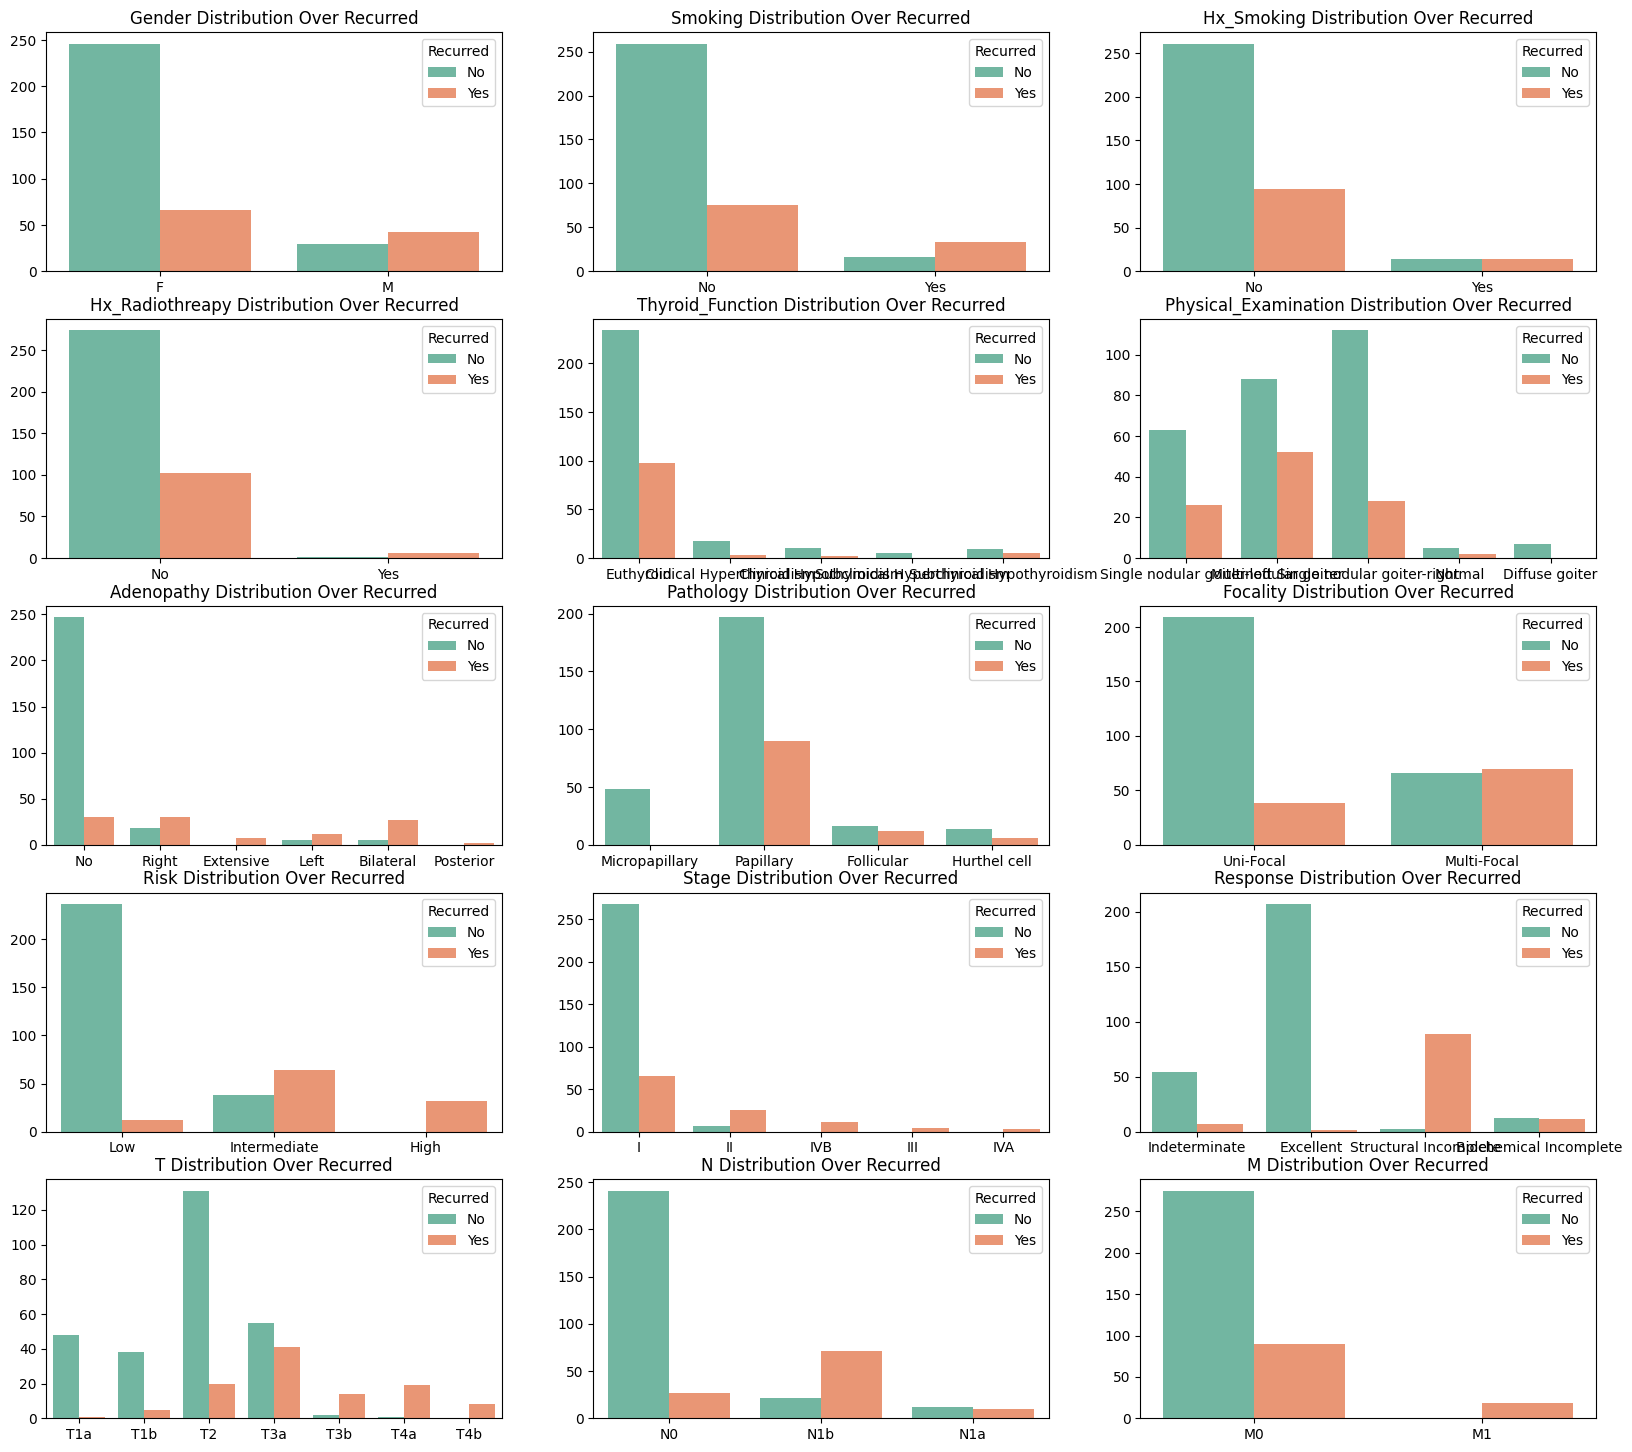

In [23]:
fig,axis = plt.subplots(5,3,figsize=(20,18))

g = sns.countplot(data=df, x="Gender", hue="Recurred", ax=axis[0,0], palette='Set2')
g.set(xlabel="")
g.set(ylabel="")
g.title.set_text("Gender Distribution Over Recurred")

g = sns.countplot(data=df, x="Smoking", hue="Recurred", ax=axis[0,1], palette='Set2')
g.set(xlabel="")
g.set(ylabel="")
g.title.set_text("Smoking Distribution Over Recurred")

g = sns.countplot(data=df, x="Hx_Smoking", hue="Recurred", ax=axis[0,2], palette='Set2')
g.set(xlabel="")
g.set(ylabel="")
g.title.set_text("Hx_Smoking Distribution Over Recurred")

g = sns.countplot(data=df, x="Hx_Radiothreapy", hue="Recurred", ax=axis[1,0], palette='Set2')
g.set(xlabel="")
g.set(ylabel="")
g.title.set_text("Hx_Radiothreapy Distribution Over Recurred")

g = sns.countplot(data=df, x="Thyroid_Function", hue="Recurred", ax=axis[1,1], palette='Set2')
g.set(xlabel="")
g.set(ylabel="")
g.title.set_text("Thyroid_Function Distribution Over Recurred")


g = sns.countplot(data=df, x="Physical_Examination", hue="Recurred", ax=axis[1,2], palette='Set2')
g.set(xlabel="")
g.set(ylabel="")
g.title.set_text("Physical_Examination Distribution Over Recurred")

g = sns.countplot(data=df, x="Adenopathy", hue="Recurred", ax=axis[2,0], palette='Set2')
g.set(xlabel="")
g.set(ylabel="")
g.title.set_text("Adenopathy Distribution Over Recurred")

g = sns.countplot(data=df, x="Pathology", hue="Recurred", ax=axis[2,1], palette='Set2')
g.set(xlabel="")
g.set(ylabel="")
g.title.set_text("Pathology Distribution Over Recurred")

g = sns.countplot(data=df, x="Focality", hue="Recurred", ax=axis[2,2], palette='Set2')
g.set(xlabel="")
g.set(ylabel="")
g.title.set_text("Focality Distribution Over Recurred")

g = sns.countplot(data=df, x="Risk", hue="Recurred", ax=axis[3,0], palette='Set2')
g.set(xlabel="")
g.set(ylabel="")
g.title.set_text("Risk Distribution Over Recurred")

g = sns.countplot(data=df, x="Stage", hue="Recurred", ax=axis[3,1], palette='Set2')
g.set(xlabel="")
g.set(ylabel="")
g.title.set_text("Stage Distribution Over Recurred")

g = sns.countplot(data=df, x="Response", hue="Recurred", ax=axis[3,2], palette='Set2')
g.set(xlabel="")
g.set(ylabel="")
g.title.set_text("Response Distribution Over Recurred")

g = sns.countplot(data=df, x="T", hue="Recurred", ax=axis[4,0], palette='Set2')
g.set(xlabel="")
g.set(ylabel="")
g.title.set_text("T Distribution Over Recurred")

g = sns.countplot(data=df, x="N", hue="Recurred", ax=axis[4,1], palette='Set2')
g.set(xlabel="")
g.set(ylabel="")
g.title.set_text("N Distribution Over Recurred")

g = sns.countplot(data=df, x="M", hue="Recurred", ax=axis[4,2], palette='Set2')
g.set(xlabel="")
g.set(ylabel="")
g.title.set_text("M Distribution Over Recurred")

plt.show()

Text(0.5, 1.0, 'Gender distribution')

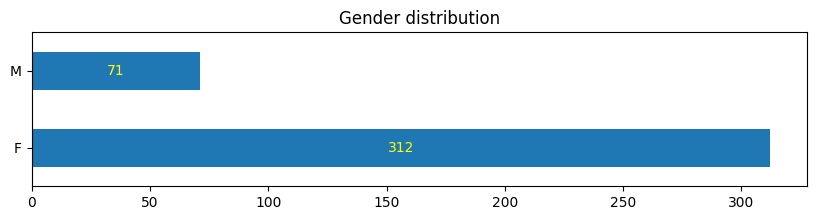

In [24]:
bar = cat_col.Gender.value_counts().plot.barh(figsize=(10,2))
plt.bar_label(bar.containers[0], label_type="center", color="yellow")
plt.title("Gender distribution")


In [25]:
# lets take last 10 columns

df.tail(10)

,Age,Gender,Smoking,Hx_Smoking,Hx_Radiothreapy,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
373,31,M,Yes,No,Yes,Euthyroid,Single nodular goiter-left,Extensive,Papillary,Multi-Focal,High,T4a,N1b,M1,II,Structural Incomplete,Yes
374,62,M,Yes,No,No,Euthyroid,Single nodular goiter-left,Left,Papillary,Multi-Focal,High,T4a,N1b,M1,IVB,Structural Incomplete,Yes
375,59,F,No,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVB,Structural Incomplete,Yes
376,40,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,I,Structural Incomplete,Yes
377,46,M,Yes,No,No,Euthyroid,Single nodular goiter-left,Bilateral,Follicular,Uni-Focal,High,T4b,N1b,M1,II,Structural Incomplete,Yes
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes
382,67,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [26]:
from sklearn.preprocessing import LabelEncoder

The **LabelEncoder** class from scikit-learn's **sklearn.preprocessing** module is used for encoding categorical (textual) data into numerical format. Specifically, it is designed to convert labels (strings or integers) into numerical labels.

**LabelEncoder** transforms categorical labels into numerical format by assigning a **unique integer** to each **distinct label.**

In [ ]:
"""# Explain "from sklearn.preprocessing import LabelEncoder" with Example

# Extra Example :
from sklearn.preprocessing import LabelEncoder

# Sample categorical data
categories = ['cat', 'dog', 'bird', 'dog', 'bird','tiger','lion']

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
encoded_categories = label_encoder.fit_transform(categories)

print("Original labels:", categories)
print("Encoded labels:", encoded_categories)

# Inverse transform to get back the original labels
original_categories = label_encoder.inverse_transform(encoded_categories)
print("Original labels after inverse transform:", original_categories)


"""

'# Explain "from sklearn.preprocessing import LabelEncoder" with Example\n\n# Extra Example :\nfrom sklearn.preprocessing import LabelEncoder\n\n# Sample categorical data\ncategories = [\'cat\', \'dog\', \'bird\', \'dog\', \'bird\',\'tiger\',\'lion\']\n\n# Create an instance of LabelEncoder\nlabel_encoder = LabelEncoder()\n\n# Fit and transform the labels\nencoded_categories = label_encoder.fit_transform(categories)\n\nprint("Original labels:", categories)\nprint("Encoded labels:", encoded_categories)\n\n# Inverse transform to get back the original labels\noriginal_categories = label_encoder.inverse_transform(encoded_categories)\nprint("Original labels after inverse transform:", original_categories)\n\n\n'

In [27]:

encode= LabelEncoder()

encode

LabelEncoder()

In [28]:
# let's convert categorical columns into numerical

for i in cat_col.columns:
  df[i]= encode.fit_transform(df[i])

# The fit_transform method both fits the encoder to the unique labels in your data
# and transforms the labels into numerical format.

#The fit method identifies all unique labels in the input and assigns a unique integer to each label.
# The mapping is stored in the encoder.

In [29]:
df.drop(columns=['T','N','M'], inplace=True)

In [30]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx_Smoking', 'Hx_Radiothreapy',
       'Thyroid_Function', 'Physical_Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'Stage', 'Response', 'Recurred'],
      dtype='object')

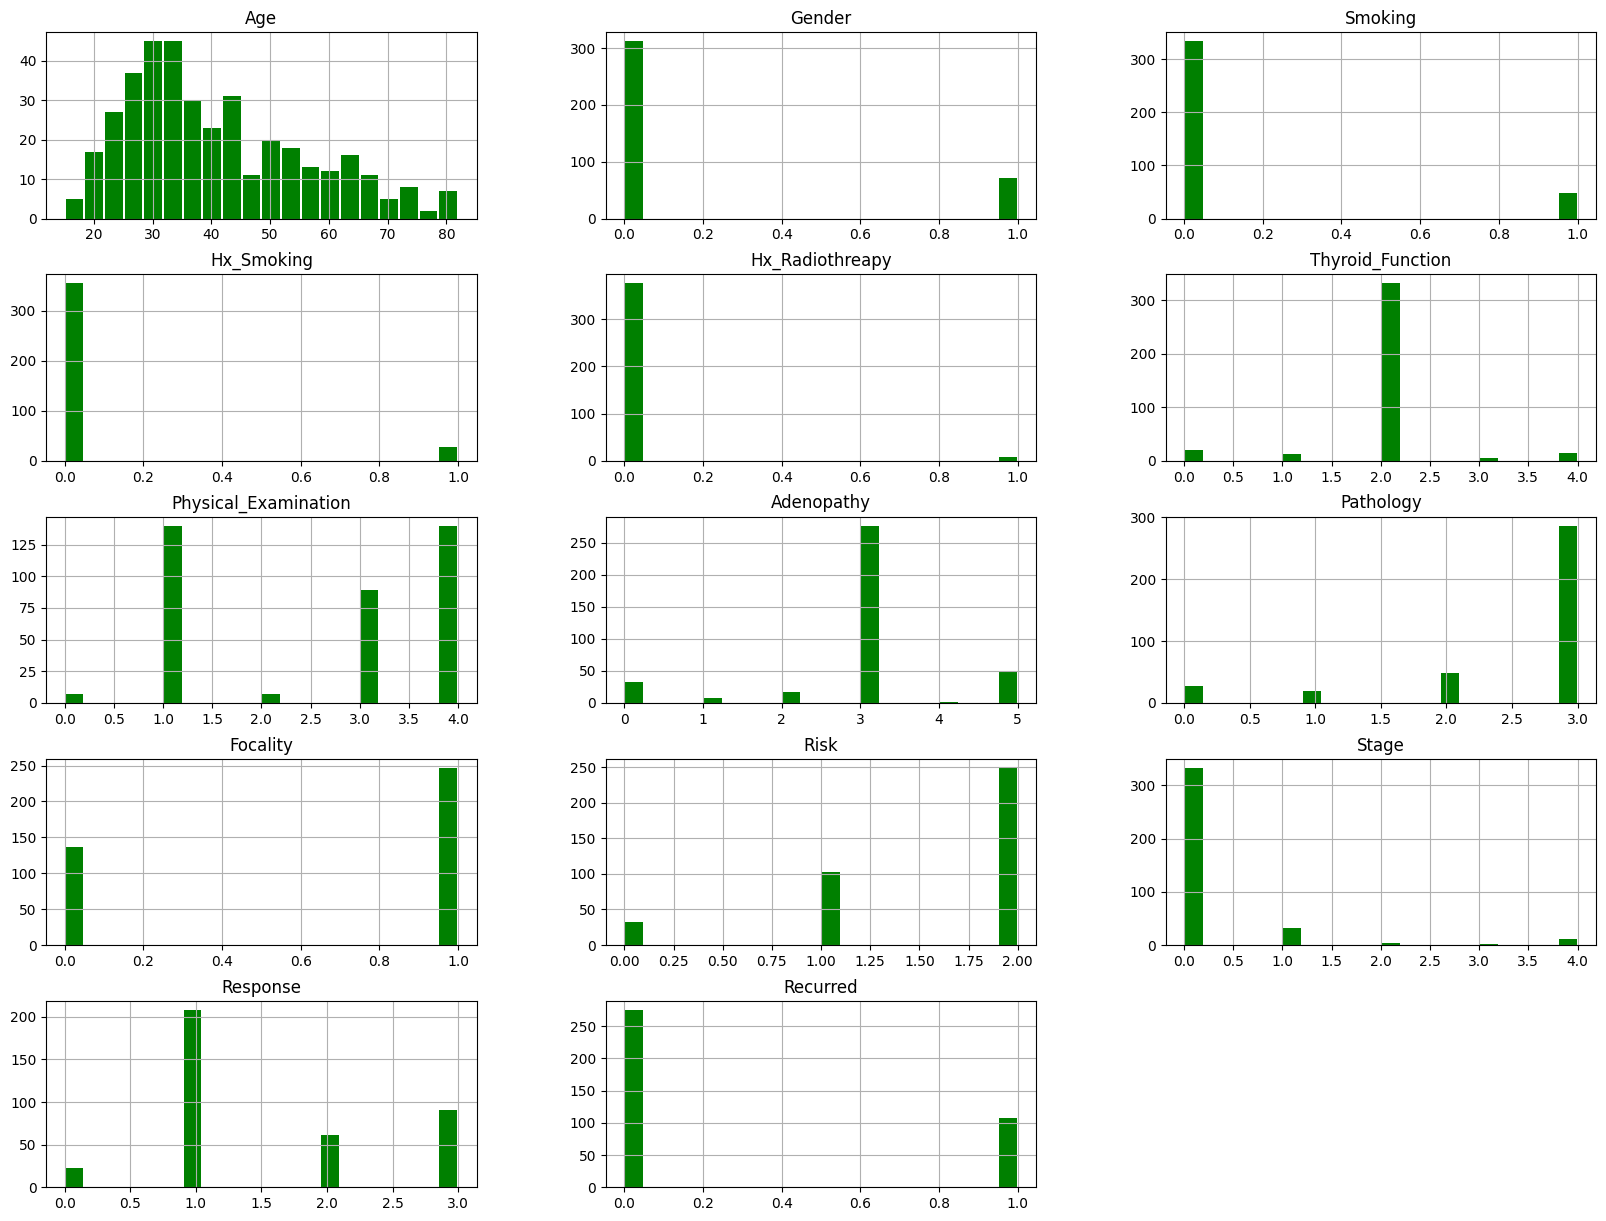

In [31]:
df.hist(column=df.columns, color='green', rwidth=0.9, layout=(5,3), bins=20, figsize=(20,15));

In [32]:
# we can plot both hist and bo plot with using functions:

plt.style.use("ggplot")

def hist_box_plots(data, col,bins='auto'):
  fig,axis = plt.subplots(ncols=2, figsize=(11,3))

  sns.histplot(data=data, x=col,bins=bins,ax=axis[0],kde=True)
  sns.boxplot(data=data, x=col,ax=axis[1])

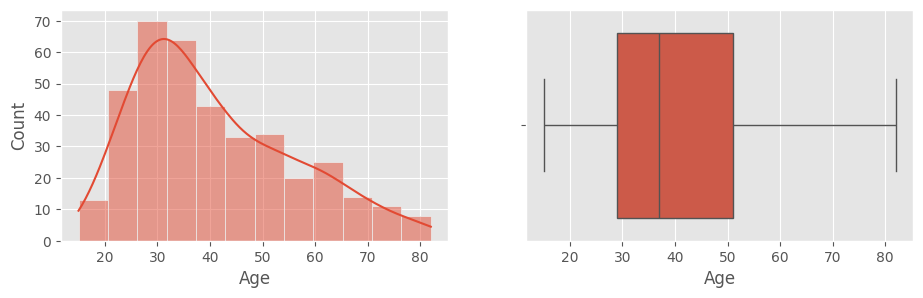

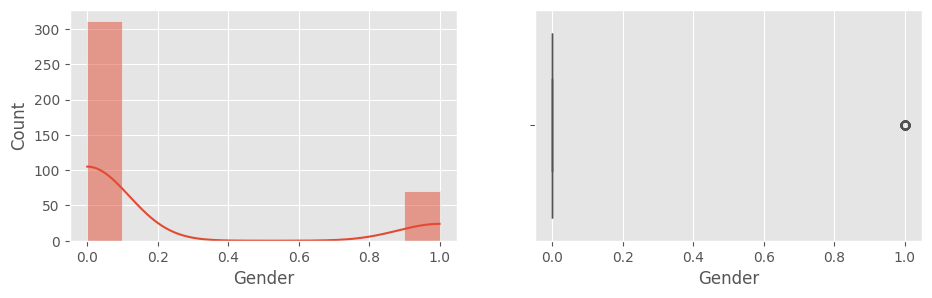

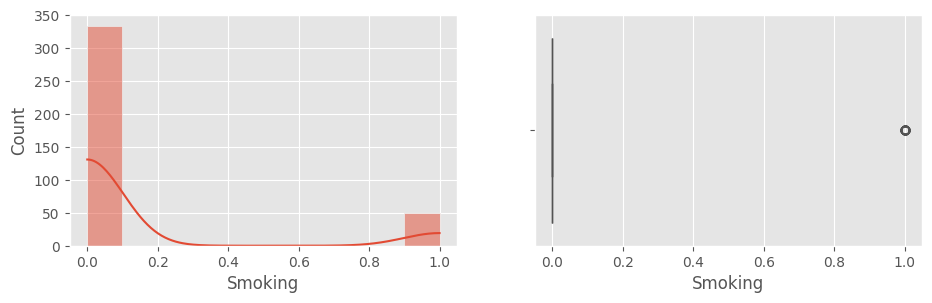

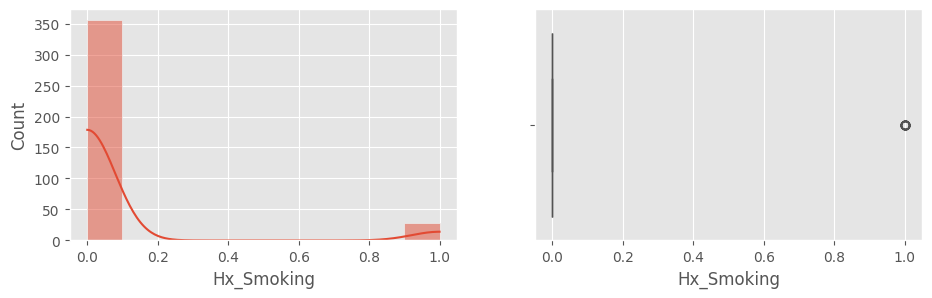

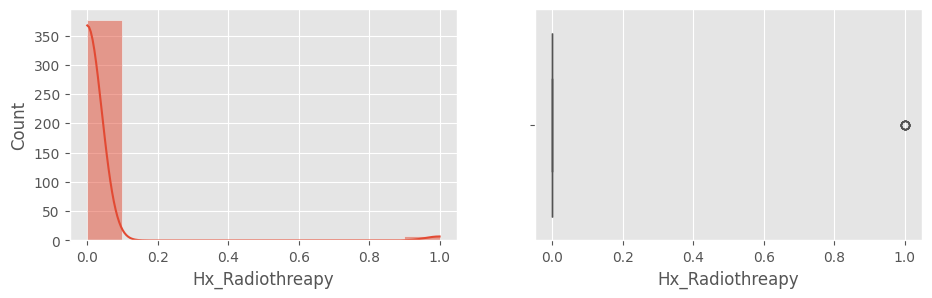

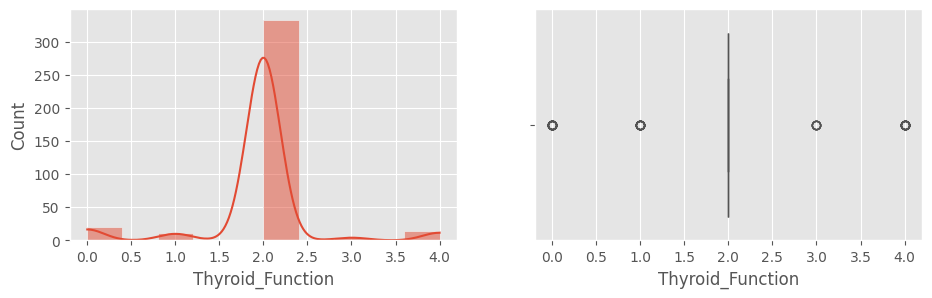

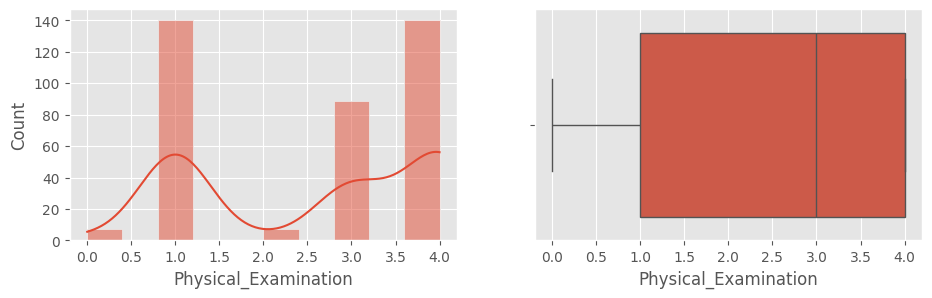

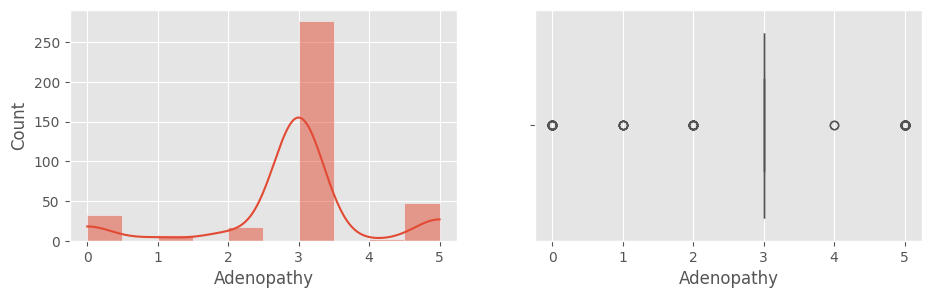

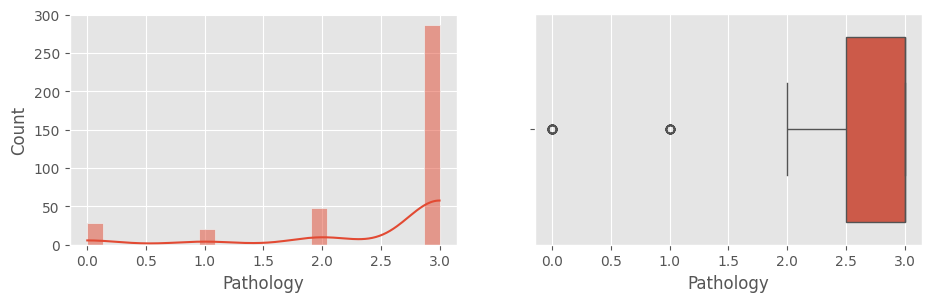

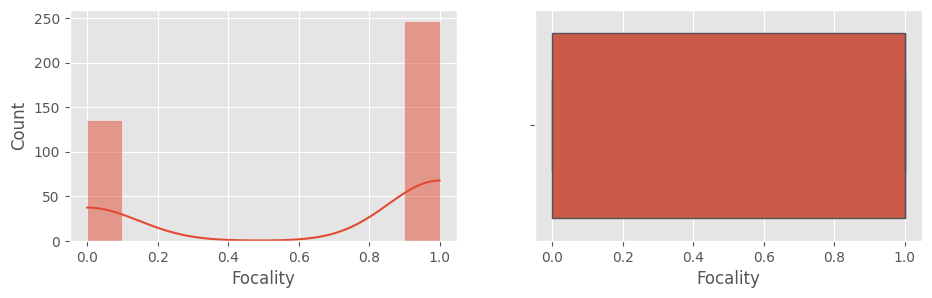

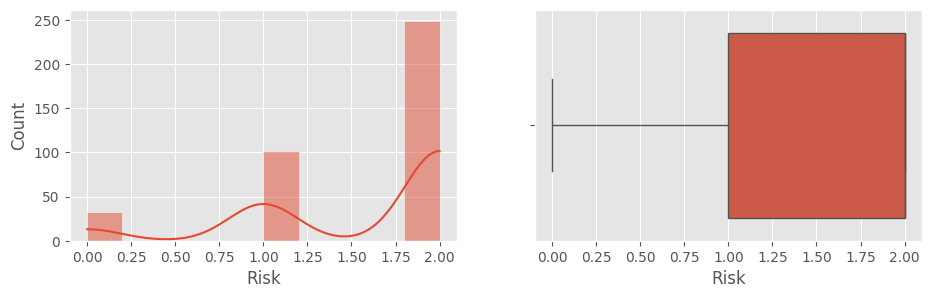

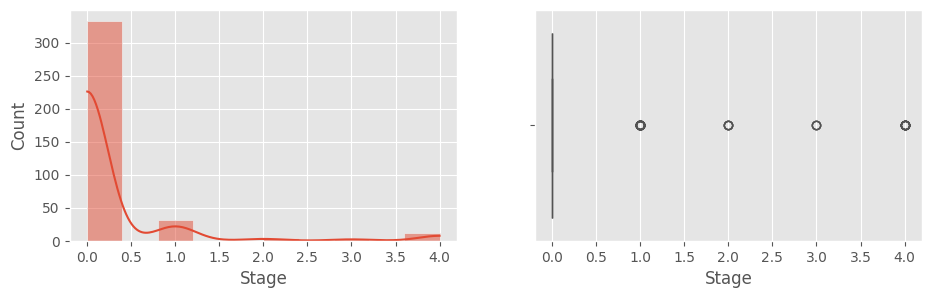

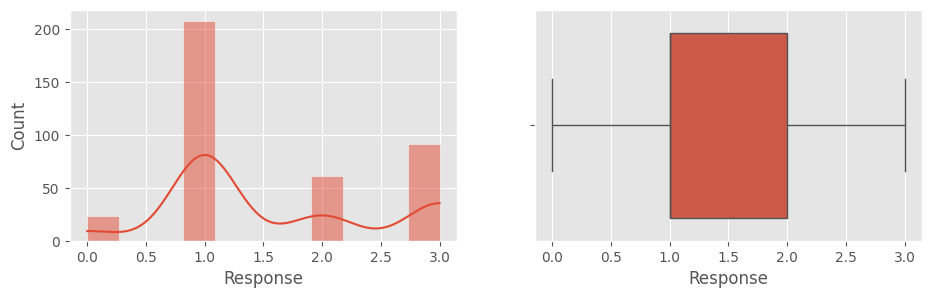

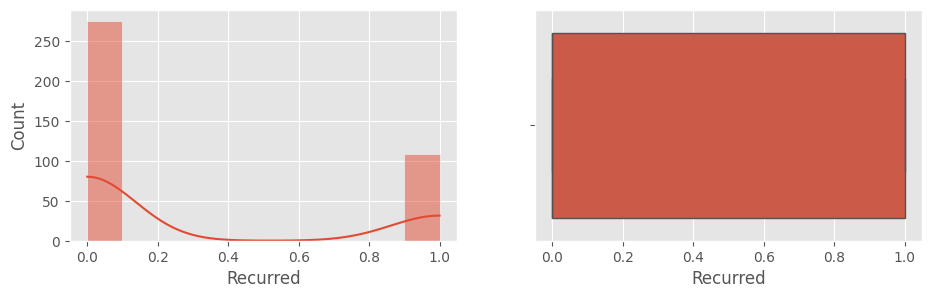

In [33]:
for col in df.columns:
  hist_box_plots(df,col)

In [34]:
# Importing Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,recall_score,precision_score,f1_score,accuracy_score

# **Modeling**

In [35]:
model = LogisticRegression()
model

LogisticRegression()

In [36]:
X = df.iloc[:,:-1]
y= df['Recurred']
display(X,y)

,Age,Gender,Smoking,Hx_Smoking,Hx_Radiothreapy,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,Stage,Response
0,27,0,0,0,0,2,3,3,2,1,2,0,2
1,34,0,0,1,0,2,1,3,2,1,2,0,1
2,30,0,0,0,0,2,4,3,2,1,2,0,1
3,62,0,0,0,0,2,4,3,2,1,2,0,1
4,62,0,0,0,0,2,1,3,2,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,2,4,5,3,1,0,4,0
379,81,1,1,0,1,2,1,1,3,0,0,4,3
380,72,1,1,1,0,2,1,0,3,0,0,4,3
381,61,1,1,1,1,0,1,1,1,0,0,3,3


0      0
1      0
2      0
3      0
4      0
      ..
378    1
379    1
380    1
381    1
382    1
Name: Recurred, Length: 383, dtype: int64

# **Data Splitting**

###### ***Here we are going to use stratified condition for balancing imbalanced data***

In [37]:
x_train, x_test, y_train,y_test = train_test_split(X,y,stratify=y, random_state=42)

In [ ]:
# lets check the data is in proportion or not
print(f"Checking the training data is in proportion:\n{y_train.value_counts(normalize=True)*100}\n\n")
print(f"Checking the testing data is in proportion:\n{y_test.value_counts(normalize=True)*100}\n\n")
print("Here we have small data thats why we are not able to get the data in proportion\n\n")
print("In above case:\n0 --> recurrance will not occur --> cancer will not comeback after inital treatment\n1 --> recurrance will occur --> cancer will recur after initial treatment ")

Checking the training data is in proportion:
0    71.777003
1    28.222997
Name: Recurred, dtype: float64


Checking the testing data is in proportion:
0    71.875
1    28.125
Name: Recurred, dtype: float64


Here we have small data thats why we are not able to get the data in proportion


In above case:
0 --> recurrance will not occur --> cancer will not comeback after inital treatment
1 --> recurrance will occur --> cancer will recur after initial treatment 


In [38]:
df.Recurred.value_counts()

0    275
1    108
Name: Recurred, dtype: int64

In [39]:
# import library for performing under sampling

from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler

In [40]:
# we have to use over or under sampling technique:
# undersampling means we are reducing the number of instances of majority class

Majority_class=df[df.Recurred==0]
Majority_class
df_undersampled_majority = resample(Majority_class, replace=True, n_samples=len(df[df.Recurred==1]), random_state=0)
df_undersampled_majority

print(f"Majority class 0 will be resample with length of Minority class 1:\n {df_undersampled_majority.Recurred.value_counts()}\n")
df_undersampled = pd.concat([df[df.Recurred == 1],df_undersampled_majority])
print(f"After adding under sampled data into dataset:\n{df_undersampled.Recurred.value_counts()}")


Majority class 0 will be resample with length of Minority class 1:
 0    108
Name: Recurred, dtype: int64

After adding under sampled data into dataset:
1    108
0    108
Name: Recurred, dtype: int64


In [41]:
df_undersampled.head()

,Age,Gender,Smoking,Hx_Smoking,Hx_Radiothreapy,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,Stage,Response,Recurred
48,26,0,0,0,0,2,2,1,3,1,1,0,3,1
87,36,0,0,0,0,2,1,3,3,0,2,0,2,1
88,35,0,0,0,0,2,1,5,3,0,1,0,3,1
89,31,1,1,0,0,2,1,5,3,0,1,0,3,1
90,18,0,0,0,0,2,4,5,3,1,1,0,3,1


In [42]:
X =df_undersampled.iloc[:,:-1]

y=df_undersampled['Recurred']
display(X,y)

,Age,Gender,Smoking,Hx_Smoking,Hx_Radiothreapy,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,Stage,Response
48,26,0,0,0,0,2,2,1,3,1,1,0,3
87,36,0,0,0,0,2,1,3,3,0,2,0,2
88,35,0,0,0,0,2,1,5,3,0,1,0,3
89,31,1,1,0,0,2,1,5,3,0,1,0,3
90,18,0,0,0,0,2,4,5,3,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,59,0,0,0,0,2,3,3,2,1,2,0,1
284,34,0,0,0,0,2,4,3,3,1,1,0,1
81,17,0,0,1,0,2,4,3,3,1,2,0,1
32,36,0,0,0,0,2,4,3,2,1,2,0,1


48     1
87     1
88     1
89     1
90     1
      ..
11     0
284    0
81     0
32     0
188    0
Name: Recurred, Length: 216, dtype: int64

In [43]:
# lets train the model:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
print(f"Checking the percentage of training data is n proportion:\n{y_train.value_counts(normalize=True)*100}\n\n")
print(f"Checking the percentage testing data is n proportion:\n{y_test.value_counts(normalize=True)*100}\n\n")
print("Here data is in proportion")

# how this data is in proportion?

Checking the percentage of training data is n proportion:
1    52.906977
0    47.093023
Name: Recurred, dtype: float64


Checking the percentage testing data is n proportion:
0    61.363636
1    38.636364
Name: Recurred, dtype: float64


Here data is in proportion


In [45]:
model = LogisticRegression()
model

LogisticRegression()

In [46]:
# training:
model.fit(x_train,y_train)

LogisticRegression()

In [47]:
# testing:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1])

In [48]:
# actual data:
y_test.values

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1])

In [49]:
# Lets see the Error :
print("Errors in testing data:")
Error = y_test - y_pred
Err = pd.Series(Error)
for i in Err:
  if i == -1:
    print(i)


# Not understood

Errors in testing data:
-1
-1
-1
-1


In [50]:
Err = pd.Series(Error)
Err

215    0
81     0
191    0
49     0
232    0
198    0
203    0
347    0
59     0
133    0
125    0
302    0
43     0
226    0
341    0
213   -1
186    0
235    0
111    0
338    0
104    0
208   -1
353    0
242    1
379    0
189    0
83     0
233    0
317    0
253    0
178    0
327    0
277   -1
193    0
94     0
291    0
349    0
153    0
71     0
373    0
371    0
282   -1
93     0
368    0
Name: Recurred, dtype: int64

In [51]:
Error = y_test - y_pred
Error

215    0
81     0
191    0
49     0
232    0
198    0
203    0
347    0
59     0
133    0
125    0
302    0
43     0
226    0
341    0
213   -1
186    0
235    0
111    0
338    0
104    0
208   -1
353    0
242    1
379    0
189    0
83     0
233    0
317    0
253    0
178    0
327    0
277   -1
193    0
94     0
291    0
349    0
153    0
71     0
373    0
371    0
282   -1
93     0
368    0
Name: Recurred, dtype: int64

In [52]:
y_test.values

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1])

In [53]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1])

# Peformance measures/metrics

In [54]:
# lets see the model accuracy
accuracy_score(y_test,y_pred)

0.8863636363636364

In [56]:
# confusion matrix
con_mat =confusion_matrix(y_test,y_pred)
con_mat

array([[23,  4],
       [ 1, 16]])

In this case:

Objective = After initial Treatment how many patient will be free from thyroid cancer:

Here for 27 patient No Recurrance occurs and for 17 patient will occur

Out of 27 patient --> model predicts that for 23 pateint cancer will not affect so these statment lies under True Negative Category

Remaning 4 patient who will not affect by thyroid cancer after treatment but model predicting that they will recurr with cancer --> False positive

Out of 17 patient --> model predicts that for 16 patient cancer will occurs so these will be --> True Positive

Remaning 1 patient who will affect by cancer in future but model predicts that he will not be recurr --> Flase Negative



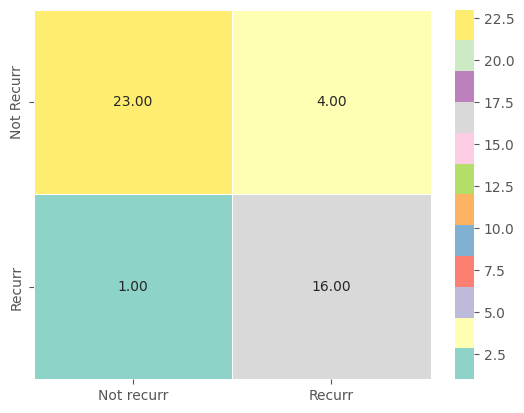

In [58]:
# lets implement confusion matrix in heatmap:
sns.heatmap(data=con_mat, annot=True, fmt=".2f",linewidth=0.6, linecolor='White',cmap='Set3', xticklabels=["Not recurr","Recurr"], yticklabels=["Not Recurr", "Recurr"])

print("In this case:\n")
print("Objective = After initial Treatment how many patient will be free from thyroid cancer:\n")
print("Here for 27 patient No Recurrance occurs and for 17 patient will occur\n")
print("Out of 27 patient --> model predicts that for 23 pateint cancer will not affect so these statment lies under True Negative Category\n")
print("Remaning 4 patient who will not affect by thyroid cancer after treatment but model predicting that they will recurr with cancer --> False positive\n")
print("Out of 17 patient --> model predicts that for 16 patient cancer will occurs so these will be --> True Positive\n")
print("Remaning 1 patient who will affect by cancer in future but model predicts that he will not be recurr --> Flase Negative\n")

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        27
           1       0.80      0.94      0.86        17

    accuracy                           0.89        44
   macro avg       0.88      0.90      0.88        44
weighted avg       0.90      0.89      0.89        44



In [61]:
recall_score(y_test,y_pred)*100

94.11764705882352

In [63]:
precision_score(y_test,y_pred)*100

80.0

In [66]:
f1_score(y_test,y_pred)*100

86.48648648648648

<Axes: >

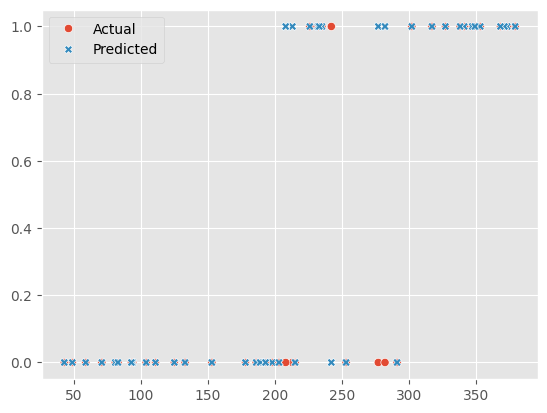

In [69]:
# logistic regression plot
log = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
sns.scatterplot(data=log)